In [ ]:
#This is a sentiment analysis program that parses the tweets from Twitter using python

In [ ]:
#importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [16]:
consumerKey = "2hNGrsJtuVdVXVohcSJs24B8X"
consumerSecret = "T0XgGlQuqVsIIc2SGWOshpUkh72DfXixPF2sesK295YT5nhy62"
accessToken = "1175656034012024834-R5ErnNtbZHtZmSLLeHuk0K4FsTUHCu"
accessTokenSecret = "GWC0IYp8GoDXw9lk3bZg5hA7x0XbTpCy5jpBNHEV4akgb"

In [17]:
#Create a authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
#create the API object while passing the auth information
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [18]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates",count =100,lang="en",tweet_mode="extended")

#print last 5 tweets of BillGates
print("5 recet tweets are: ")
i=1
for tweet in posts[0:5]:
  print(str(i) + ')' +tweet.full_text+ '\n')
  i+=1

5 recet tweets are: 
1)Through renewed investments in malaria and NTDs, we can help end these endemic diseases, and prevent future pandemics. https://t.co/Aw9fIJHr2H

2)Daniel Boakye of @TheENDFund has spent 45 years working on solutions for neglected tropical diseases, including river blindness. As he says, “We have the tools we need. The priority now is to deploy them in the right way to get to elimination.” https://t.co/Mzdh5sOoCr

3)When most people think about what produces greenhouse gas emissions, they think about cars and electricity. But they add up to only about one third of the total. Clean hydrogen could help eliminate the rest: https://t.co/CtB8gnMB2Z https://t.co/WUocOWxKcr

4)The Power by @NaomiAllthenews raises timely questions about the way people are connected by gender, family, community, and country. https://t.co/N0CLt6p8vK

5)Important guidance from @TheADDF founder @a_hfillit outlining the path forward on Alzheimer’s: 
▪️ More – and better – biomarkers
▪️ Explorat

In [19]:
#creating a dataframe with a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])

#Show first 5 rows of data
df.head()

,Tweets
0,Through renewed investments in malaria and NTD...
1,Daniel Boakye of @TheENDFund has spent 45 year...
2,When most people think about what produces gre...
3,The Power by @NaomiAllthenews raises timely qu...
4,Important guidance from @TheADDF founder @a_hf...


In [20]:

#Clean the text

#create a function to clean tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-1]+', '',text )   
  text=re.sub(r'#', '',text)  
  text=re.sub(r'RT[\s]+', '',text)
  text=re.sub(r'https?:\/\/\S+','', text)
  return text

#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)
#Show the text
df

,Tweets
0,Through renewed investments in malaria and NTD...
1,Daniel Boakye of has spent 45 years working o...
2,When most people think about what produces gre...
3,The Power by raises timely questions about th...
4,Important guidance from founder _hfillit outl...
...,...
95,Giving a TED talk is always a memorable (and n...
96,"Each day, polio workers around the world cross..."
97,Building a software company is nothing compare...
98,The Global Fund is one of the kindest things p...


In [21]:
#Function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#Create a function to get ploarities      
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#New Dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,Through renewed investments in malaria and NTD...,0.125000,0.000000
1,Daniel Boakye of has spent 45 years working o...,0.317857,0.092857
2,When most people think about what produces gre...,0.590000,0.173333
3,The Power by raises timely questions about th...,0.000000,0.000000
4,Important guidance from founder _hfillit outl...,0.666667,0.466667
...,...,...,...
95,Giving a TED talk is always a memorable (and n...,0.750000,0.562500
96,"Each day, polio workers around the world cross...",0.000000,0.000000
97,Building a software company is nothing compare...,0.900000,0.500000
98,The Global Fund is one of the kindest things p...,0.033333,0.000000


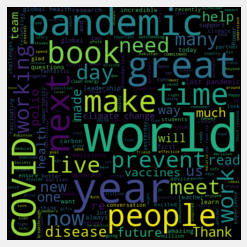

In [22]:
#Wordclouds anna textclouds anna okkate visuilization where more specific word appears with big and bold
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=500,random_state=30,max_font_size=110).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
#Create a function to compute the negative,neutral and positive analysics
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis']=df['Polarity'].apply(getAnalysis)

#Show dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Through renewed investments in malaria and NTD...,0.125000,0.000000,Neutral
1,Daniel Boakye of has spent 45 years working o...,0.317857,0.092857,Positive
2,When most people think about what produces gre...,0.590000,0.173333,Positive
3,The Power by raises timely questions about th...,0.000000,0.000000,Neutral
4,Important guidance from founder _hfillit outl...,0.666667,0.466667,Positive
...,...,...,...,...
95,Giving a TED talk is always a memorable (and n...,0.750000,0.562500,Positive
96,"Each day, polio workers around the world cross...",0.000000,0.000000,Neutral
97,Building a software company is nothing compare...,0.900000,0.500000,Positive
98,The Global Fund is one of the kindest things p...,0.033333,0.000000,Neutral


In [24]:
#print all the positive tweets
j=1
sortedDf=df.sort_values(by=['Polarity'])     #sort values in dataframe by polarity
for i in range(0,sortedDf.shape[0]):        #Lopping through number of rows and the sorted dataframe
  if (sortedDf['Analysis'][i]=='Positive'): #If analysics positive ayyite 
    print(str(j) + ')' + sortedDf['Tweets'][i])                      #number of rows in Dataframe pyna sortedDF.shape[0]  ki
    print()
    j+=1

1)Daniel Boakye of  has spent 45 years working on solutions for neglected tropical diseases, including river blindness. As he says, “We have the tools we need. The priority now is to deploy them in the right way to get to elimination.” 

2)When most people think about what produces greenhouse gas emissions, they think about cars and electricity. But they add up to only about one third of the total. Clean hydrogen could help eliminate the rest:  

3)Important guidance from  founder _hfillit outlining the path forward on Alzheimer’s: 
▪️ More – and better – biomarkers
▪️ Exploratory trials
▪️ Repurposed drugs


4)My advice is simple: read a lot and discover a skill you enjoy. For some, that means being great at science or a great communicator. There’s so much opportunity to do good in the world.

5)It made me think a lot about what I would tell my younger self. I remember this guy. A lot has changed since this photo, but I remember how excited I felt for the next chapter. 

6)I was recen

In [25]:
#print negative tweets
j=1
sortedDf=df.sort_values(by=['Polarity'] , ascending='False')     #sort values in dataframe by polarity   in decending order
for i in range(0,sortedDf.shape[0]):        #Lopping through number of rows and the sorted dataframe
  if (sortedDf['Analysis'][i]=='Negative'): #If analysics negative ayyite 
    print(str(j) + ')' + sortedDf['Tweets'][i])                      #number of rows in Dataframe pyna sortedDF.shape[0]  ki
    print()
    j+=1

1)Yesterday, I had a chance to spend the day focusing on climate – and the innovations that can prevent the very worst effects of climate change. 

2)To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: 



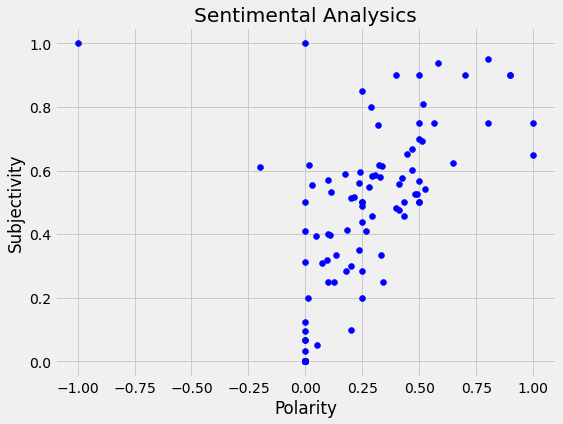

In [26]:
#Plot the polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue' )
plt.title('Sentimental Analysics')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [27]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
#ptweets

round( (ptweets.shape[0]/df.shape[0])*100,1 )

74.0

In [28]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']
#ptweets

round( (ptweets.shape[0]/df.shape[0])*100,1 )

2.0

In [29]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']
#ptweets

round( (ptweets.shape[0]/df.shape[0])*100,1 )

24.0

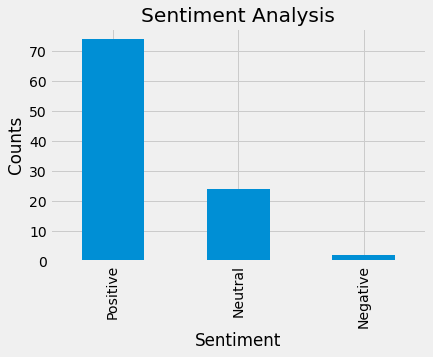

In [30]:
#Show the value count
df['Analysis'].value_counts()

#Plot and visualize the count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()